# Problema 8.190 livro Fox et al. 8.ed questão 8.190

Alunos: <br>Alan Henrique Pereira Miranda 202102140072 <br>
Savio De Oliveira Moreira 202002140052

In [1]:
import math
from IPython.display import Image
import numpy as np
from scipy import optimize
import pandas as pd
import sympy as sy

### Parâmetros de entrada:
    - E: 5.416e-05 # [m] -> Rugosidade da parede interna do duto
    - Q: 1.9e-3  # [m³/s] -> Vazão no sistema
    - pi: 3.141592653589793 -> Pi
    - Dim: 20.93e-3 # [m] -> Diâmetro interno do duto
    - A: pi * (Din / 2) ** 2 # [m²] -> Área da secção do tubo
    - rho: 998 # [kg/m3] -> Densidade do fluido (água)
    - mu: 0.001 # [Pa.s] -> Viscosidade do fluido (água
    - A: 0.000344055 # [m²] -> Área da secção do tubo
    - Re: 115351.97442 # [ ] -> n.º de reynolds para o escoamento
    - f0: 0.009 # chute do método de newton
    - Lc: 30 * Din # [m] -> Comprimento de duto relativo ao cotovelo
    - Lt: 20 * Din # [m] -> Comprimento de duto relativo ao tronco
    - Lsec1: 3  # [m] -> Comprimento da secção 1 do duto
    - Lsec2: 12.2  # [m] -> Comprimento da secção 2 do duto
    - Lsec3: 6.1  # [m] -> Comprimento da secção 3 do duto



Segue os passos para resolver o problema da questão a seguir:

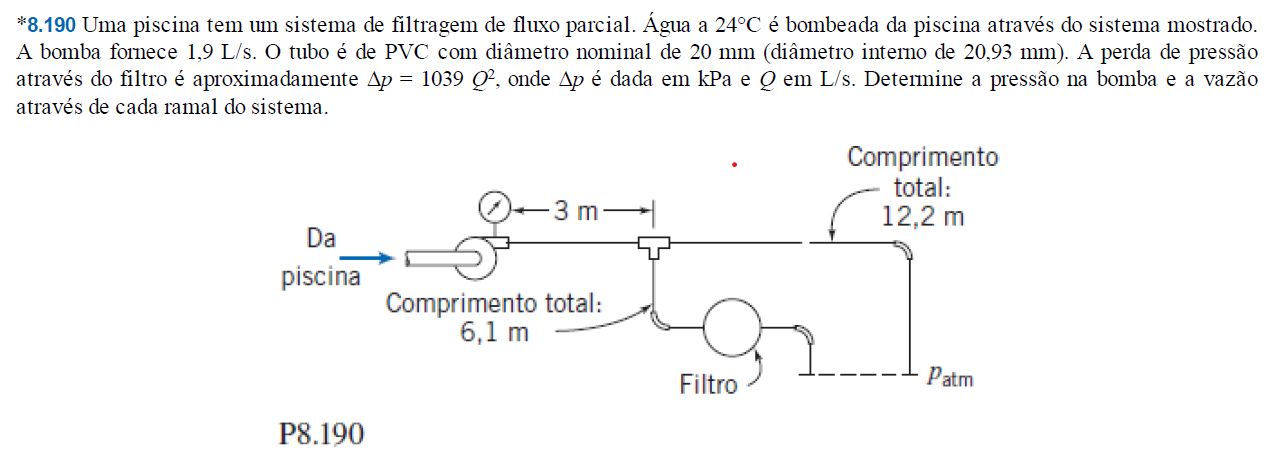

In [2]:
Image(filename='questão.png')

O problema consiste em uma malha de tubulação ramificada onde é encontrado uma bomba de água que alimenta um sistema ramificado de tubulação com filtragem parcial, as incognitas são:
    - Potência da bomba de
    - Vazão em cada ramificação do sistema.

O sistema pode ser dividido em três blocos de tubulação:
    - Tubulação de entrada. (Secção 1)
    - Tubulação de saída. (Secção 2)
    - Tubulação de filtragem parcial. (Secção 3)

### Secção 1: Tubulação de entrada
Há três elementos na secção 1:
    - Bomba da piscina. (A ser dimensionado)
    - 3 m de tubulação. (Lsec1 nos cálculos)
    - Tronco de ramificação.

* A bomba da piscina é o total da perda de carga geral da malha, logo, é o último passo do cálculo.

* Tubulação é a referência de perda de carga, logo, tudo vai ser convertido para comprimento de tubulação
    - 3 [m]. (Lsec1 nos cálculos)
    - Tronco de ramificação: 20 * Diâmetro do tubo [m].

A ideia é que o problema seja resolvido utilizando o método de Newton-Raphson.
   - Nº de Reynolds para a secção 1: Re = 115.351,9744 (escoamento turbulento)

   - Equação de colebroke 1 / √f = 2 * ln( 3.7 * (E/D) + 2.51 / (Re * √f))

   - Substituindo os valores e utilizando o método de Newton-Raphson:
        f = 0.026367887783683545

   - (perda de carga) = f * (L / D) * (Vmed ^2) / 2

   - (variação de pressão) = (perda de carga) * (rho_água)

   - Segue as modelagens dos cálculos para a secção 1:


In [3]:
E = 5.416e-05  # [m] -> Rugosidade da parede interna do duto

Q = 1.9e-3  # [m³/s] -> Vazão no sistema

pi = math.pi

Din = 20.93e-3 # [m] -> Diâmetro interno do duto

A = pi * (Din / 2) ** 2 # [m²] -> Área da secção do tubo

rho = 998 # [kg/m3] -> Densidade do fluido (água)

mu = 1e-3 # [Pa/s] -> Viscosidade dinâmica do fluido (agua)

v = Q / A # [m/s] -> Velocidade do escoamento

Re = rho * Din * v / mu # [] -> n.º de reynolds para o fluido em questão

f0 = 0.009

Lc = 30 * Din
Lt = 20 * Din
Lsec1 = 3  # [m] -> Comprimento da secção 1 do duto
Lsec12 = 12.2  # [m] -> Comprimento da secção 2 do duto
Lsec13 = 6.1  # [m] -> Comprimento da secção 3 do duto

In [4]:
# velocidade de ecoamento:
data_df1 = pd.DataFrame({'velocidade média (m/s)': [v],
                         'Diâmetro do tubo (m)': [Din],
                         'Viscosidade Dinâmica (Pa/s)': [mu],
                         'Densidade esp água (kg/m³)':[rho] ,
                         'Reynolds': [Re]})
data_df1

velocidade média (m/s)  Diâmetro do tubo (m)  Viscosidade Dinâmica (Pa/s)  \
0                5.522367               0.02093                        0.001   

   Densidade esp água (kg/m³)       Reynolds  
0                         998  115351.974426

##### Equação de Colebroke e cálculo do fator de atrito:

In [5]:
def colebroke(f):
    return 1 / (f ** 0.5) + 2.0 * np.log10(E / (3.7 * Din) + 2.51 / (Re * f ** 0.5))
def colebroke_derivada(f):
    return -0.5 * f ** (-1.5) - 2.51 * f ** (-1.5) / (Re * (2.51 * f ** (-0.5) / Re + 0.27027027027027 * E / Din) * np.log(10))

##### fator de atrito por método de Newton-Raphson:
* perda de carga e variação de pressão:

In [6]:
fator_de_atrito, results = optimize.newton(colebroke, f0, colebroke_derivada, full_output=True)

In [7]:
f = fator_de_atrito
hl12 = f * (Lsec1 + Lt) / Din * (v ** 2 / 2)
dp12 = hl12 * rho

In [8]:
data_df2 = pd.DataFrame({'Fator de Atrito':[f],
                         'Perda de Carga (m²/s²)': [hl12],
                         'Diferença de Pressão (Pa)': [dp12]})
data_df2

Fator de Atrito  Perda de Carga (m²/s²)  Diferença de Pressão (Pa)
0         0.026368               65.671197               65539.854537

### Secção 2: Tubulação de saída
Há dois elementos na secção 1:
    - 12.2 [m] de tubulação. (Lsec2 nos cálculos)
    - cotovelo. (30 * diâmetro da tubulação)

Comprimento efetivo da tubulação será de: 12,8279 m

In [9]:
Ltotal12 = Lsec12 + Lc
Ltotal12

12.8279

### Secção 3: Tubulação de filtragem parcial
Há três elementos na secção 1:
    - 6.1 [m] de tubulação. (Lsec3 nos cálculos)
    - Tronco de ramificação.
    - Tubulação de filtragem parcial.

1. A questão é a ausência de valores sobre a vazão nas secções e a perda de carga gerada pelo filtro, mas sabe-se que a variação de pressão gerada pelo filtro é de 1039 * (vazão da secção 3) ^2
2. A vazão na secção 2 depende da vazão na secção 3.
3. A soma das vazões na secção 2 e 3 é a vazão na secção 1. (1,9 L/s)
4. A perda de pressão nas secções 2 e 3 são iguais

Portanto, a solução é uma equação de colebroke composta por ambas as secções, relacionando vazão com a variação de pressão.
Uma simplificação será calcular as perdas de cargas sem o filtro, para que seja possível calcular o fator de atrito na secção 3.

(daqui para baixo eu tenho que consertar a equação de colebroke para o novo problema envolvendo as duas secções)

Comprimento total da secção 3:

In [10]:
Ltotal13 = Lsec13 + Lc * 2
Ltotal13

7.3557999999999995

Balanços de cargas em função da vazão Q13 e dos fatores de atrito de cada secção:
Iterar os valores de vazão e de fator de atrito para que seja possível calcular o fator de atrito na secção 3.

In [11]:
fator12 = []
fator13 = []
vazao13 = []
vazao13.append(0.5e-3)
fator12.append(f)
fator13.append(f)
Ltotal12 = Lsec12 + Lc
Ltotal13 = Lsec13 + Lc * 2
i = 0

Loop para iteração dos parâmetros envolvidos e obtenção da vazão na secção 23 e os fatores de atrito para as secções 23 e 24

In [12]:
while i < 10:
    reynolds13 = rho * Din * vazao13[i] / (A * mu)
    reynolds12 = rho * Din * (1.9/1000 - vazao13[i]) /(A * mu)


    def colebroke12(f, reynolds12=reynolds12):
        return 1 / (f ** 0.5) + 2.0 * np.log10(E / (3.7 * Din) + 2.51 / (reynolds12 * f ** 0.5))


    def colebroke_derivada12(f, reynolds12=reynolds12):
        return -0.5 * f ** (-1.5) - 2.51 * f ** (-1.5) / (reynolds12 * (2.51 * f ** (-0.5) / reynolds12 + 0.27027027027027 * E / Din) * np.log(10))

    def colebroke13(f, reynolds13=reynolds13):
        return 1 / (f ** 0.5) + 2.0 * np.log10(E / (3.7 * Din) + 2.51 / (reynolds13 * f ** 0.5))


    def colebroke_derivada13(f, reynolds13=reynolds13):
        return -0.5 * f ** (-1.5) - 2.51 * f ** (-1.5) / (reynolds13 * (2.51 * f ** (-0.5) / reynolds13 + 0.27027027027027 * E / Din) * np.log(10))


    fator_de_atrito12, results12 = optimize.newton(colebroke12, fator12[i], colebroke_derivada12, full_output=True)
    fator_de_atrito13, results13 = optimize.newton(colebroke13, fator13[i], colebroke_derivada13, full_output=True)


    def resultante2(vazao_sec13, f3=fator_de_atrito13, f2=fator_de_atrito12):
        return Q/((rho * f3 * Ltotal13 + 2078 * Din * A ** 2) / (rho * f2 * Ltotal12) ** (1/2) + 1) - vazao_sec13

    fluxo = optimize.newton(resultante2, vazao13[i])
    fator12.append(fator_de_atrito12)
    fator13.append(fator_de_atrito13)
    vazao13.append(fluxo)
    f12 = fator_de_atrito12
    f13 = fator_de_atrito13
    i += 1

Valores obtidos para cada secção de fator de atrito e vazão:

In [13]:
vazao_sec13 = pd.Series(vazao13)
vazao_sec12 = Q - vazao_sec13
f23 = pd.Series(fator13)
f23 = f23.iloc[-1]
f24 = pd.Series(fator12)
f24 = f24.iloc[-1]
database = pd.DataFrame({'Fator de Atrito Secção 23':[f23],
                         'Fator de Atrito Secção 24':[f24],
                         'Vazão Secção 23 (L/s)':vazao_sec13.iloc[-1]*1000,
                         'Vazão Secção 24 (L/s)':vazao_sec12.iloc[-1]*1000})
database

Fator de Atrito Secção 23  Fator de Atrito Secção 24  \
0                   0.036817                   0.026447   

   Vazão Secção 23 (L/s)  Vazão Secção 24 (L/s)  
0               0.121107               1.778893

Perdas de carga e perdas de pressão associadas:

In [14]:
velocidade24 = vazao_sec13.iloc[-1]/A
f24 = database['Fator de Atrito Secção 24'].iloc[-1]
f23 = database['Fator de Atrito Secção 23'].iloc[-1]
velocidade23 = vazao_sec12.iloc[-1]/A
hl24 = f24 * Ltotal12 / Din * (velocidade24 ** 2 / 2)
hl23 = f23 * Ltotal13 / Din * (velocidade23 ** 2 / 2)
dp24 = hl24 * rho
dp23 = hl23 * rho
data_sec24 = pd.DataFrame({'Perda de carga secção 24 (m²/s²)':[hl24],
                           'Perda de pressão secção 24 (Pa)':[dp24],
                           'Perda de carga da secção 23 (m²/s²)':[hl23],
                           'Perda de pressão da secção 23 (Pa)':[dp23]})
data_sec24

Perda de carga secção 24 (m²/s²)  Perda de pressão secção 24 (Pa)  \
0                          1.004186                      1002.177917   

   Perda de carga da secção 23 (m²/s²)  Perda de pressão da secção 23 (Pa)  
0                           172.952943                       172607.036905